<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_1546/808841243.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')


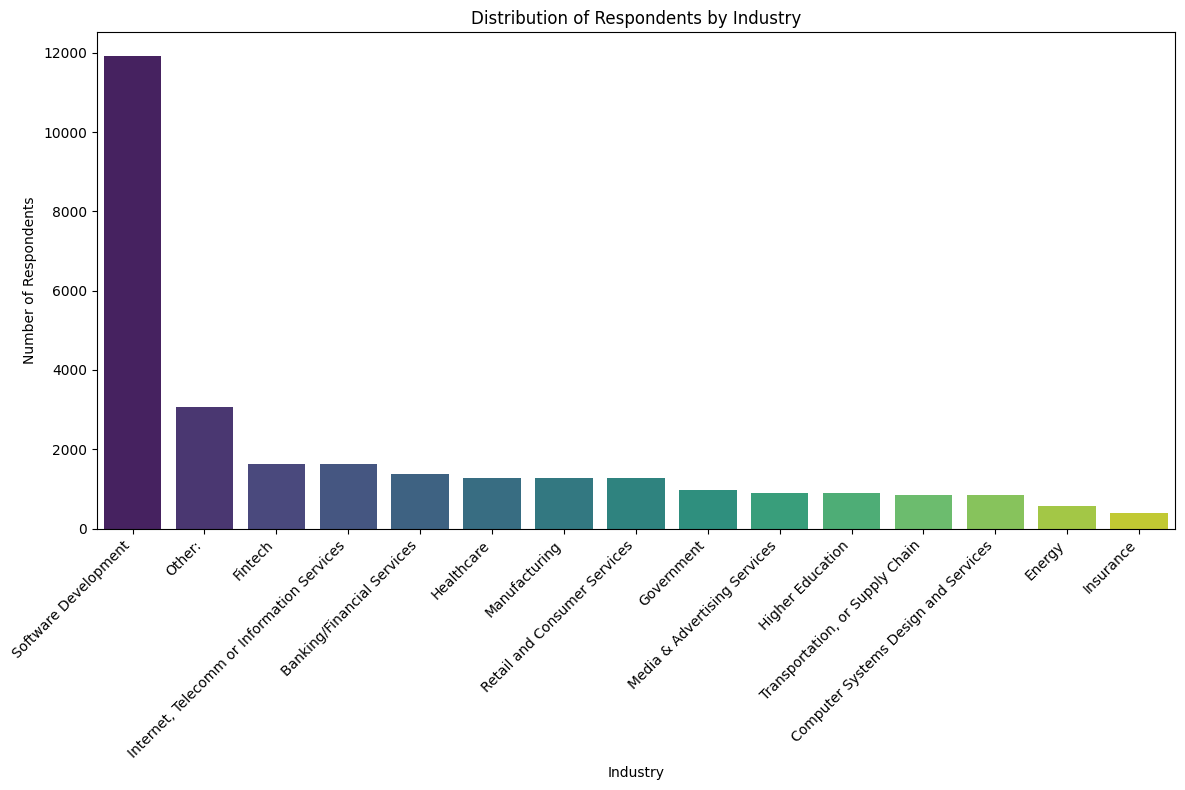

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if the 'Industry' column exists
if 'Industry' in df.columns:
    # Count the number of respondents per industry
    industry_counts = df['Industry'].value_counts()

    # Plot the bar chart
    plt.figure(figsize=(12, 8))
    sns.barplot(x=industry_counts.index, y=industry_counts.values, palette='viridis')

    # Customize the plot
    plt.title('Distribution of Respondents by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Number of Respondents')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Display the industry counts
    print(industry_counts)
else:
    print("The dataset does not have an 'Industry' column.")


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
# Calculate the basic statistics for ConvertedCompYearly
mean_salary = df['ConvertedCompYearly'].mean()
median_salary = df['ConvertedCompYearly'].median()
std_salary = df['ConvertedCompYearly'].std()

# Display basic statistics
print(f'Mean Salary: {mean_salary}')
print(f'Median Salary: {median_salary}')
print(f'Standard Deviation of Salary: {std_salary}')

# Identify compensation values exceeding 3 standard deviations above the mean
threshold = mean_salary + (3 * std_salary)
outliers = df[df['ConvertedCompYearly'] > threshold]

# Display outliers
print(f'\nNumber of outliers: {len(outliers)}')
print('Outliers:')
print(outliers[['ConvertedCompYearly']].head())  # Display top 5 outliers

Mean Salary: 86155.28726264134
Median Salary: 65000.0
Standard Deviation of Salary: 186756.97308629757

Number of outliers: 89
Outliers:
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Number of outliers: 978


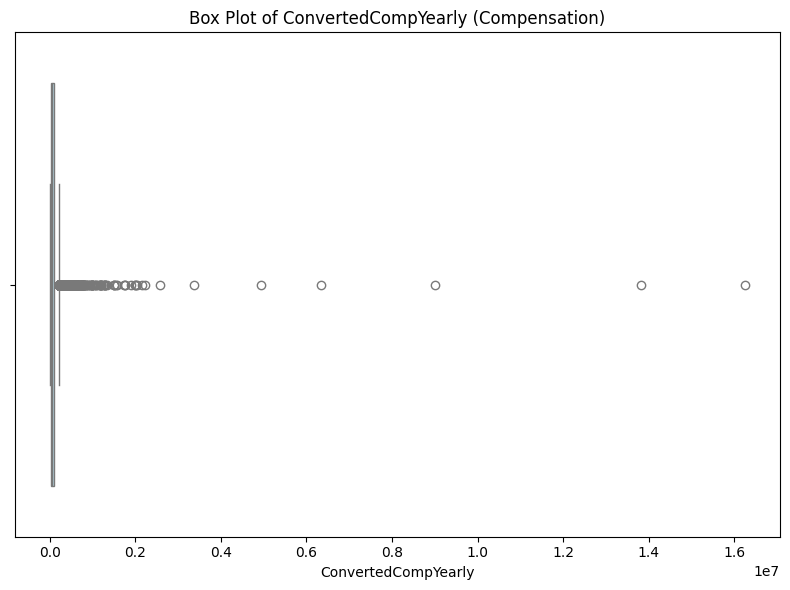

     ConvertedCompYearly
428             230000.0
456             300000.0
461             254425.0
529             650000.0
545             400000.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the first (25th percentile) and third (75th percentile) quartiles
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Display the number of outliers
print(f'Number of outliers: {len(outliers)}')

# Plot a boxplot to visualize the outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ConvertedCompYearly'], color='lightblue')
plt.title('Box Plot of ConvertedCompYearly (Compensation)')
plt.xlabel('ConvertedCompYearly')
plt.tight_layout()
plt.show()

# Optionally, display the outliers data
print(outliers[['ConvertedCompYearly']].head())  # Display top 5 outliers

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
# Filter the dataset to remove rows with outliers in the 'ConvertedCompYearly' column
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
print(f'Original DataFrame size: {df.shape}')
print(f'New DataFrame size (without outliers): {df_no_outliers.shape}')

# Optionally, display the first few rows of the new DataFrame
print(df_no_outliers.head())

Original DataFrame size: (65437, 114)
New DataFrame size (without outliers): (22457, 114)
     ResponseId                                         MainBranch  \
72           73                     I am a developer by profession   
374         375  I am not primarily a developer, but I write co...   
379         380                     I am a developer by profession   
385         386                     I am a developer by profession   
389         390                     I am a developer by profession   

                 Age                                         Employment  \
72   18-24 years old  Employed, full-time;Student, full-time;Indepen...   
374  25-34 years old                                Employed, full-time   
379  35-44 years old                                Employed, full-time   
385  35-44 years old  Independent contractor, freelancer, or self-em...   
389  25-34 years old             Employed, full-time;Student, part-time   

                               RemoteW

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [7]:
# Map the Age column to approximate numeric values if necessary
# For example, if age is in ranges like "20-30", we could assign the midpoint of the range to each value.
# First, we need to check if 'Age' is in a range format. If it's numeric already, this step isn't needed.

# Example of mapping age ranges (adjust this based on your dataset)
def map_age(age):
    if isinstance(age, str) and '-' in age:
        lower, upper = map(int, age.split('-'))
        return (lower + upper) / 2
    return age

# Apply the mapping function to the 'Age' column
df['AgeTransformed'] = df['Age'].apply(map_age)

# Compute the correlation matrix between 'AgeTransformed' and other numerical variables
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()

# Focus on correlations with 'AgeTransformed'
age_correlation = correlation_matrix['AgeTransformed'].sort_values(ascending=False)

# Display correlations with Age
print(age_correlation)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


ValueError: invalid literal for int() with base 10: '44 years old'

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
